In [1]:
import numpy as np
import matplotlib.pyplot as plt

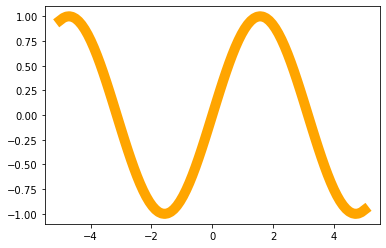

In [2]:
X = np.linspace(-5,5,100)
y = np.sin(X)

plt.plot(X,y,c='orange',lw=10)
plt.show()

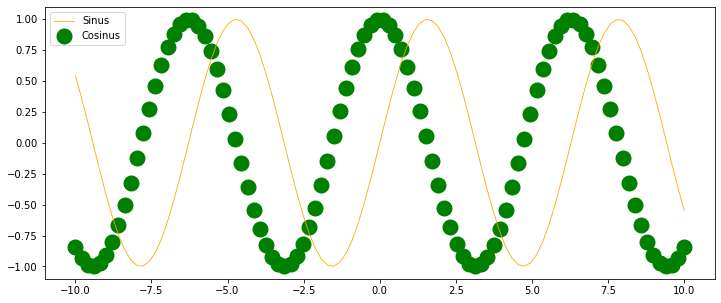

In [3]:
X = np.linspace(-10,10,100)

plt.figure(figsize=(12,5))
plt.plot(X, np.sin(X), c='orange', lw=0.8, label='Sinus')
plt.scatter(X, np.cos(X), c='g', lw=10, label='Cosinus')

plt.legend()
plt.show()

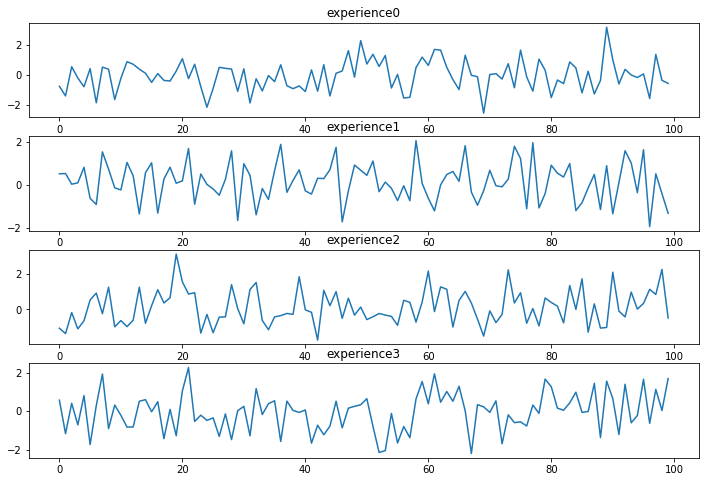

In [5]:
dataset = {f"experience{i}": np.random.randn(100) for i in range(4)}

def graphique(data):
    n = len(data)
    plt.figure(figsize=(12, 8))
    
    for k, i in zip(data.keys(), range(1, n+1)):
        plt.subplot(n, 1, i)
        plt.plot(data[k])
        plt.title(k)
        
    plt.show()

graphique(dataset)

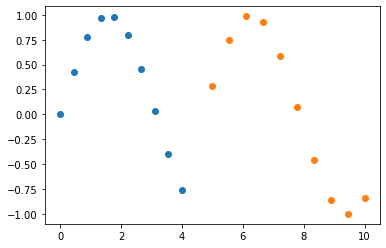

In [8]:
from scipy.interpolate import interp1d

x1 = np.linspace(0, 4, 10)
x2 = np.linspace(5,10,10)
y1 = np.sin(x1)
y2 = np.cos(x2)

plt.scatter(x1,y1)
plt.scatter(x2,y2)

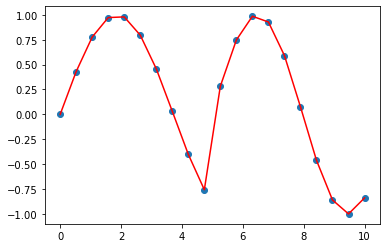

In [7]:
y = np.concatenate((y1,y2), axis=0)

# création de la fonction interpolation f
x = np.linspace(0,10,20)
f = interp1d(x, y, kind='cubic')

# résultats de la fonction interpolation f sur de nouvelles données
new_x = np.linspace(0, 10, 20)
result = f(new_x)

# visualisation avec matplotlib
plt.scatter(x, y)
plt.plot(new_x, result, c='r')

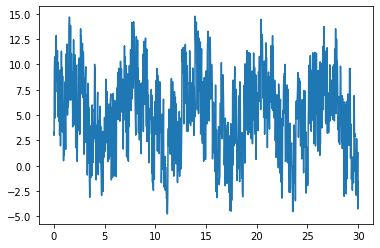

In [34]:
# Création d'un signal périodique noyé dans du bruit.
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)

In [35]:
from scipy import fftpack

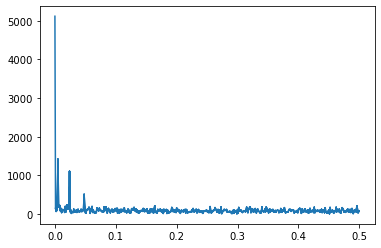

In [36]:
# création des variables Fourier et Fréquences, qui permettent de construire le spectre du signal.
fourier = fftpack.fft(y)
power = np.abs(fourier) # la variable power est créée pour éliminer les amplitudes négatives
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

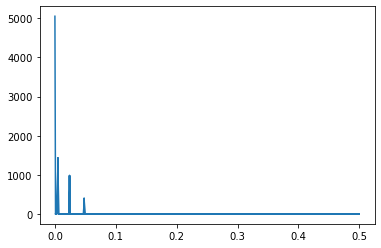

In [14]:
# filtre du spectre avec du boolean indexing de Numpy
fourier[power<400] = 0

# Visualisation du spectre propre
plt.plot(np.abs(frequences), np.abs(fourier))

In [16]:
# Transformation de Fourier Inverse: genere un nouveau signal temporel depuis le spectre filtré
filtered_signal = fftpack.ifft(fourier)

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


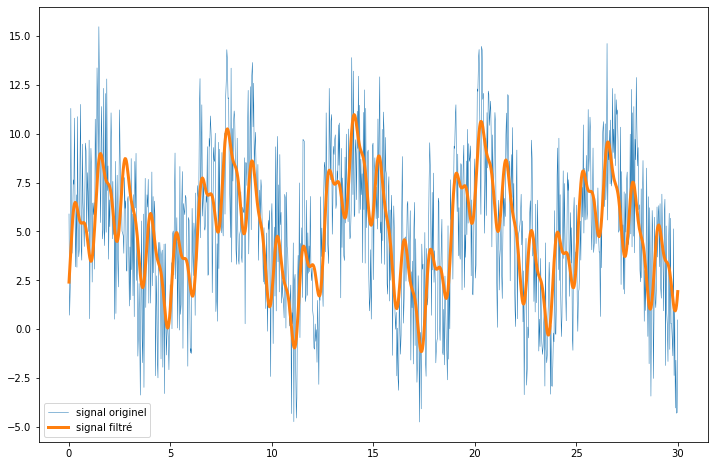

In [19]:
# Visualisation des résultats

plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5, label='signal originel')
plt.plot(x, filtered_signal, lw=3, label='signal filtré')
plt.legend()
plt.show()

In [26]:
from scipy import ndimage

(507, 537)

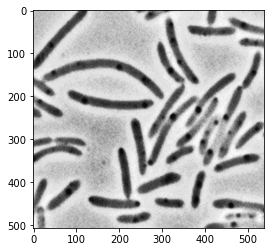

In [24]:
# importer l'image avec pyplot
image = plt.imread('img/bacteria.png')
image = image[:,:,0] # réduire l'image en 2D
plt.imshow(image, cmap='gray') # afficher l'image
image.shape

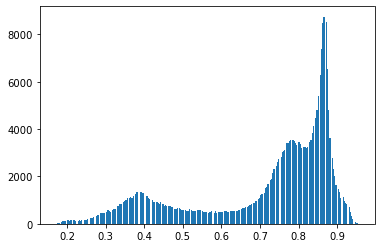

In [27]:
# copie de l'image, puis création d'un histogramme
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

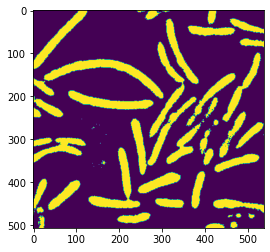

In [28]:
# boolean indexing: création d'une image binaire
image= image<0.6
plt.imshow(image)

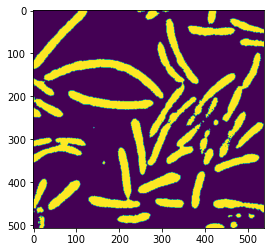

In [29]:
# morphologie utilisée pour enlever les défauts
open_image = ndimage.binary_opening(image)
plt.imshow(open_image)

il y a 53 groupes


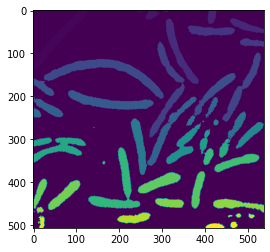

In [30]:
# Segmentation de l'image: label_image contient les différents labels et n_labels est le nombre de labels
label_image, n_labels = ndimage.label(open_image)
print(f'il y a {n_labels} groupes')

# Visualisation de l'image étiquetée
plt.imshow(label_image)

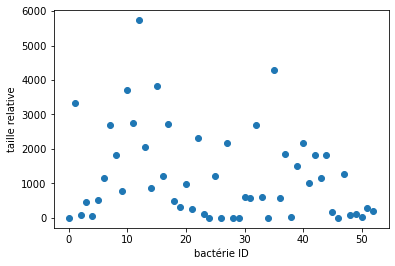

In [31]:
# Mesure de la taille de chaque groupes de label_images (fait la somme des pixels)
sizes = ndimage.sum(open_image, label_image, range(n_labels))

# Visualisation des résultats
plt.scatter(range(n_labels), sizes)
plt.xlabel('bactérie ID')
plt.ylabel('taille relative')
plt.show()

In [21]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

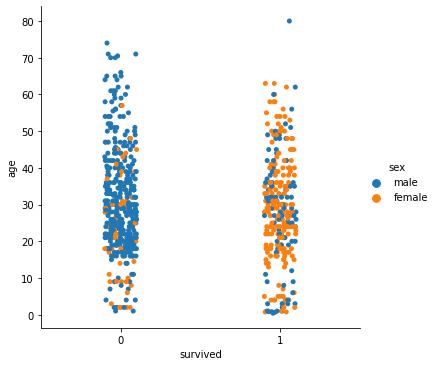

In [22]:
sns.catplot(x='survived', y='age', data=titanic, hue='sex')